$~SEGUNDO~PARCIAL~FÍSICA~COMPUTACIONAL$

Se hace la implementación del artículo: Trajectories of charged particles trapped in Earth’s magnetic field de M. Kaan. Se busca simular la trayectória de partículas relativistas cargadas que quedan atrapadas en el campo geomagnético(magnetoesféra) dando lugar a la radiación de Van Allen. El campo magnético terrestre se modela por medio de un dipolo magnético cuando se analizan vecindades a esta no mayores a $4$ radios terrestres $Re$.

EL viento solar es una corriente de plasma que trae consigo el campo magnético del sol.
Cuando el viento solar se encuentra con la magnetoesfera de la tierra los dos campos no se mezclan debido a la condición  "frozen-in flux" la cual dicta que las partículas de plasma se mantienen sobre las lineas de campo magnético excepto en algunos lugares. El viento solar entonces, afecta el campo de la magneto-esfera aplicando presión mecánica y magnética sobre este. La compresión del campo magnético que da directamente al sol es directamente proporcional a la actividad solar. Del lado contrario de la magneto-esfera (noche) el viento solar arrastra las lineas de campo a distancias grandes creando la denominada la cola magnética.
Las partículas que quedan atrapadas formando los anillos de radiación de van allen, son altamente energéticas(en el orden de algunos MeV para los electrones y algunos cientos de MeV para los protones) y están relativamente cerca a la tierra (1000km- 6$Re$).


El movimiento de dichas partículas dentro del campo magnético está dado por un movimiento compuesto que contiene movimiento de "cyclotron, rebote y de arrastre".

EL movimiento de una partícula cargada con carga $q$ y masa $m$ en un campo eléctrico $\vec{E}$ y un campo magnético $\vec{B}$, se modela por medio de la ecuación de Newton-Lorentz :
\begin{equation}
\frac{d(\gamma m \vec{v})}{dt} = q\vec{E(r)}+ q \vec{v}\times \vec{B(r)}
\end{equation}

Donde $\gamma = (1-v^{2}/c^{2})^{-1/2}$ es el factor de lorentz.

Se supone $\vec{E}= 0$. Del producto cruz se observa que la aceleración será perpedicular a $\vec{B}$ y a $\vec{v}$ todo el tiempo, por lo tanto la rapidez de la partícula se mantendrá constante junto con el factor $\gamma$ naturalmente.

Las partículas se mueven en un movimiento helicoidal paralelo al vector de campo. La parte de dicho movimiento se denomina "movimiento de cyclotrón". La frecuenca de este movimiento $\Omega$, y su respectivo radio están dados por:
\begin{equation}
\Omega = \frac{q|B|}{\gamma m}
\end{equation}


\begin{equation}
\rho = \frac{\gamma m v_{\bot}}{q |B|}
\end{equation}

Donde $v_{\bot}$ es la componente perpendicular de la velocidad respecto al campo magnético.

La existencia de un plasma(partículas cargadas a altas velocidades), implica que el campo eléctrico paralelo puede ser despreciado.

El campo dominante en el cinturón de Van Allen es el campo magnético, por lo tanto la fuerza dominante será la fuerza magnética (en este caso el campo geomagnético será estático).

Ahora bien, la expresión para el dipolo magnético es:
\begin{equation}
\vec{B(r)}_{dip}= \frac{\mu_{0} }{4\pi r^{3}}[3(\vec{M}\cdot \hat{r})\hat{r}-\vec{M}]
\end{equation}

$\vec{r}$ es el vector de posición.  $\vec{M}$ es el momento magnético, que para el caso terrestre se toma así:
\begin{equation}
\vec{M} = -M\hat{z}
\end{equation}
Esto debido a que el polo norte magnético está ubicado cerca al polo sur geofráfico.

En el ecuador magnético ($x=1Re,y=z=0$), la fuerza del campo eléctrico es aproximadamente $B_{0} = 3.07 \times 10^{-5}[T]$

Si se realiza la siguiente sustitución $\mu_{0}M/4\pi = B_{0}Re^{3}$, se obtiene lo siguiente en la ecuación del dipolo magnético:
\begin{equation}
\vec{B(r)}_{dip}= -\frac{B_{0}Re^{3} }{r^{5}}[3xz\hat{x}+3yz\hat{y}+(2z^{2}-x^{2}-y^{2})\hat{z}]
\end{equation}

Para calcular la rapidez del protón, se debe hacer utilizando expresiones relativistas, para ello se utiliza la relación:
\begin{equation}
K_{e} = \gamma m_{0}c^{2}-m_{0}c^{2}
\end{equation}
por lo tanto la rapidez inicial será:
\begin{equation}
v = c\sqrt{1-\frac{1}{\left(\frac{K_{e}}{m_{0}c^{2}}+1\right)^{2}}}
\end{equation}

In [1]:
import numpy as np
from numpy import sin, pi, linspace, cos,arange
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de simulación todo en el sistema SI
Ke = 10e6*(1.602176565e-19) # energía cinética de los protones
m = 1.672621777e-27 # masa del protón
c = 299792458 # velocidad de la luz en el vacío
A= Ke/(m*c**2) 
v = c*np.sqrt(1-(1/(A+1)**2)) #rapidez inicial de los protones
print('Rapidez inicial de los protones = ', round(v/c,2),'c')
re = 6378137 # radio terrestre
B0 = 3.07e-5 # intensidad de campo magnético
q = 1.602176565e-19# carga del protón
gamma = 1/np.sqrt(1-(v/c)**2) 
#periodo de ciclotrón
T = (2*pi*gamma*m)/(q*B0)
angulo_inicial = 30*pi/180 

# condiciones iniciales para las partículas
vx_ini_1 = 0 # considerando que la partícula parte del plano yz
vy_ini_1 = v*sin(angulo_inicial)
vz_ini_1 = v*cos(angulo_inicial)
condiciones_iniciales = np.array([2*re,0,0,vy_ini_1,0,vz_ini_1])
condiciones_iniciales_2 = np.array([4*re,0,0,vy_ini_1,0,vz_ini_1])
#se garantiza que por lo menos existan 8 puntos por periodo del ciclotron
dt = T/10
tiempo = arange(0,120,dt) # vector de tiempo

Rapidez inicial de los protones =  0.14 c


Para utilizar el método de Runge Kutta es necesario disminuir el orden de la ecuación de movimento, como es un movimiento en 3 dimensiones, resultará en un sistema de 6 ecuaciones diferenciales de primer orden acopladas. Las ecuaciones de movimiento son:

\begin{equation}
\frac{dv_{x}}{dt} = -G\left(v_{y}(2z^{2}-x^{2}-y^{2})-3v_{z}yz)\right)
\end{equation}
\begin{equation}
\frac{dv_{y}}{dt} = G\left(v_{x}(2z^{2}-x^{2}-y^{2})-3v_{z}xz)\right)
\end{equation}
\begin{equation}
\frac{dv_{z}}{dt} = -G\left(3v_{x}yz-3xzv_{y}\right)
\end{equation}
\begin{equation}
G = \frac{B0re^{3}q}{r^{5}m\gamma}
\end{equation}

Disminuyendo el orden se tiene el sistema de ecuaciones a simular, la función fun_ tiene definido dicho sistema:

In [2]:
def fun_(x,t,B0,re,m,gamma,q):
    #x[0] = x, x[1] =x', x[2]=y, x[3]=y', x[4]=z, x[5]=z'
    factor = (q*B0*(re**3))/(gamma*m)
    denominador = (x[0]*x[0]+x[2]*x[2]+x[4]*x[4])**2.5
    fac = factor/denominador
    dx = x[1]
    dy = x[3]
    dz = x[5]
    dvx = -fac*(x[3]*(2*x[4]*x[4]-x[0]*x[0]-x[2]*x[2])-3*x[5]*x[4]*x[2])
    dvy =  fac*(x[1]*(2*x[4]*x[4]-x[0]*x[0]-x[2]*x[2])-3*x[5]*x[4]*x[0])
    dvz = -fac*(3*x[1]*x[2]*x[4]-3*x[0]*x[4]*x[3]) 
    return np.array([dx,dvx,dy,dvy,dz,dvz])#([dx,dy,dz,dvx,dvy,dvz])#([dx,dvx,dy,dvy,dz,dvz])

In [3]:
solucion = odeint(fun_, condiciones_iniciales, tiempo, args=(B0,re,m,gamma, q),atol = 1e-9,rtol = 1e-9)
solucion_2 = odeint(fun_, condiciones_iniciales_2, tiempo, args=(B0,re,m,gamma, q), atol = 1e-9,rtol = 1e-9)
# posición para el primer protón (se divide por re para dejar todo expresado en unidades de radio terrestre)
x = solucion[:,0]/re
y = solucion[:,2]/re
z = solucion[:,4]/re
# posición para el segundo protón
x_2 = solucion_2[:,0]/re
y_2 = solucion_2[:,2]/re
z_2 = solucion_2[:,4]/re

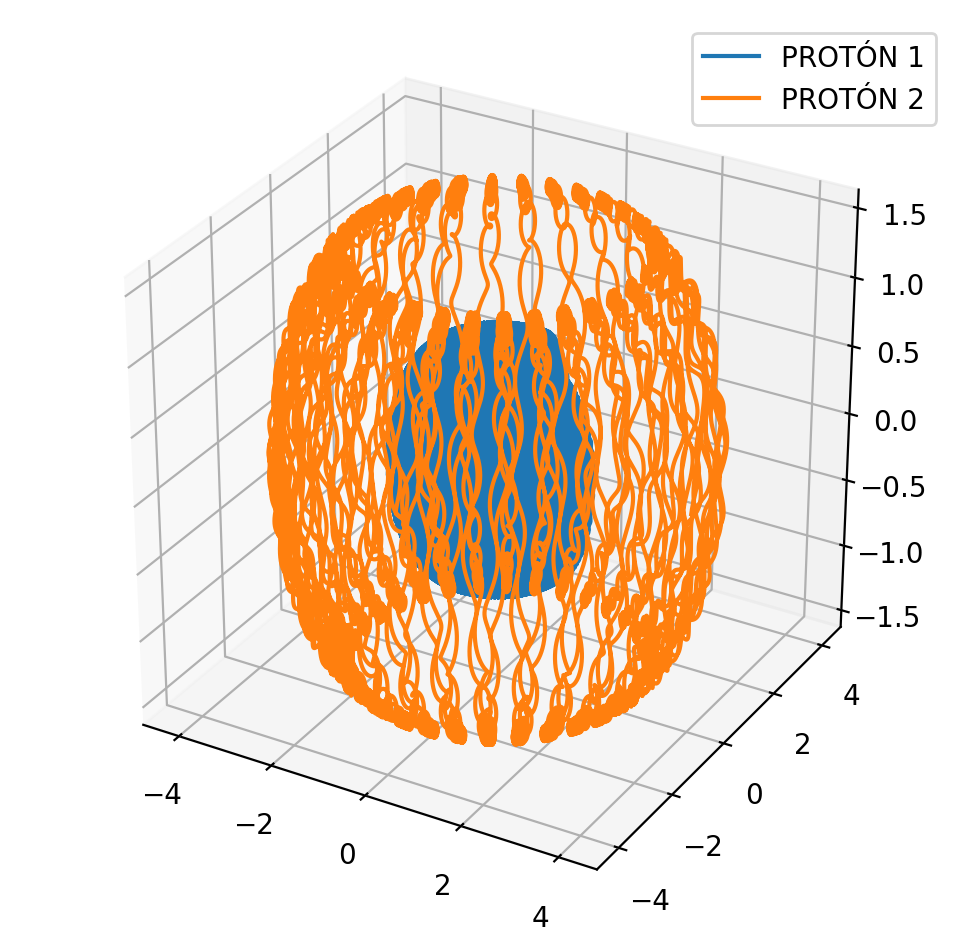

In [4]:
fig = plt.figure(num = 1, figsize = (6,6),dpi=200)
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='PROTÓN 1')
ax.plot(x_2, y_2, z_2, label='PROTÓN 2')
ax.legend()
plt.show()

Proyección plano xy

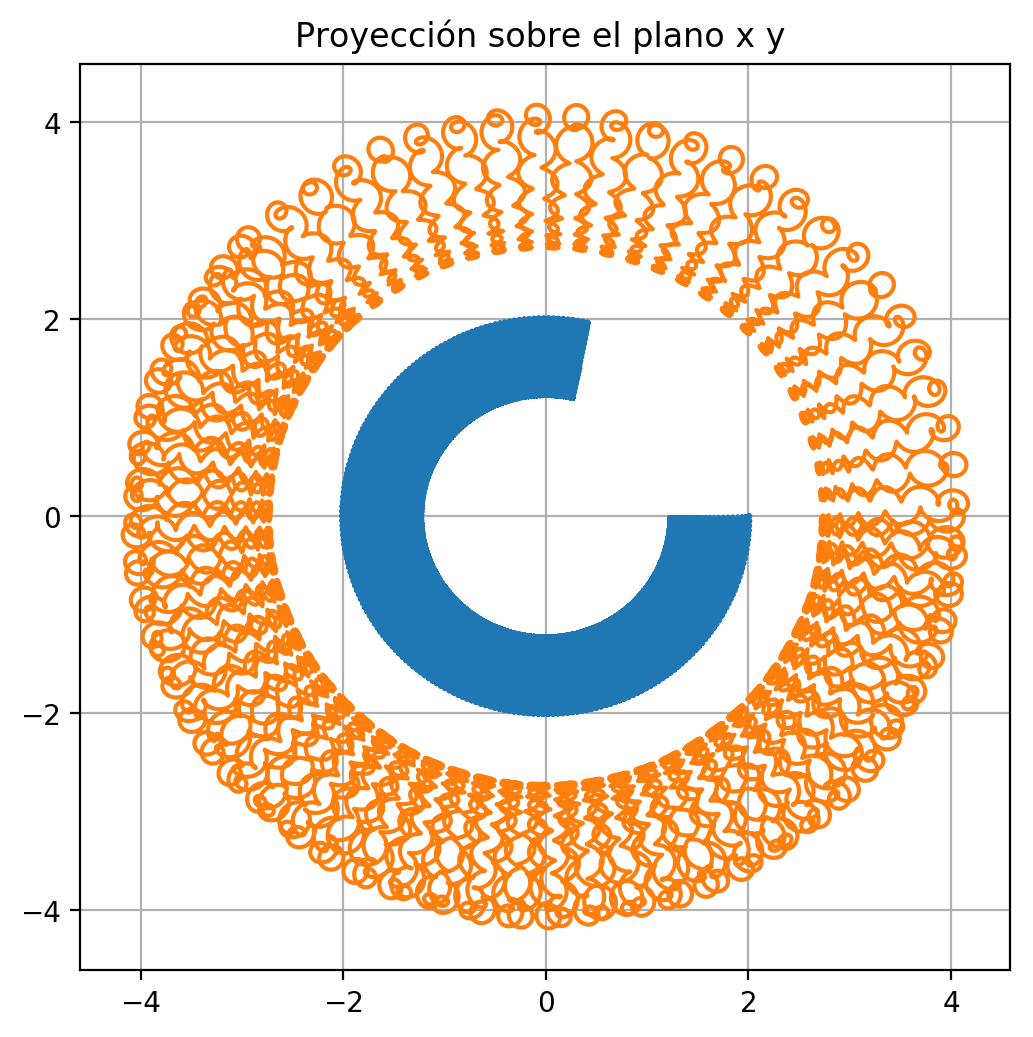

In [5]:
plt.figure(num = 2, figsize = (6,6),dpi=200)
plt.plot(x,y)
plt.plot(x_2,y_2)
plt.grid(True)
plt.title('Proyección sobre el plano x y ')
plt.show()

Para las condiciones iniciales acontinuación se obtienen las siguientes trayectórias cuando la partícula apunta a la tierra

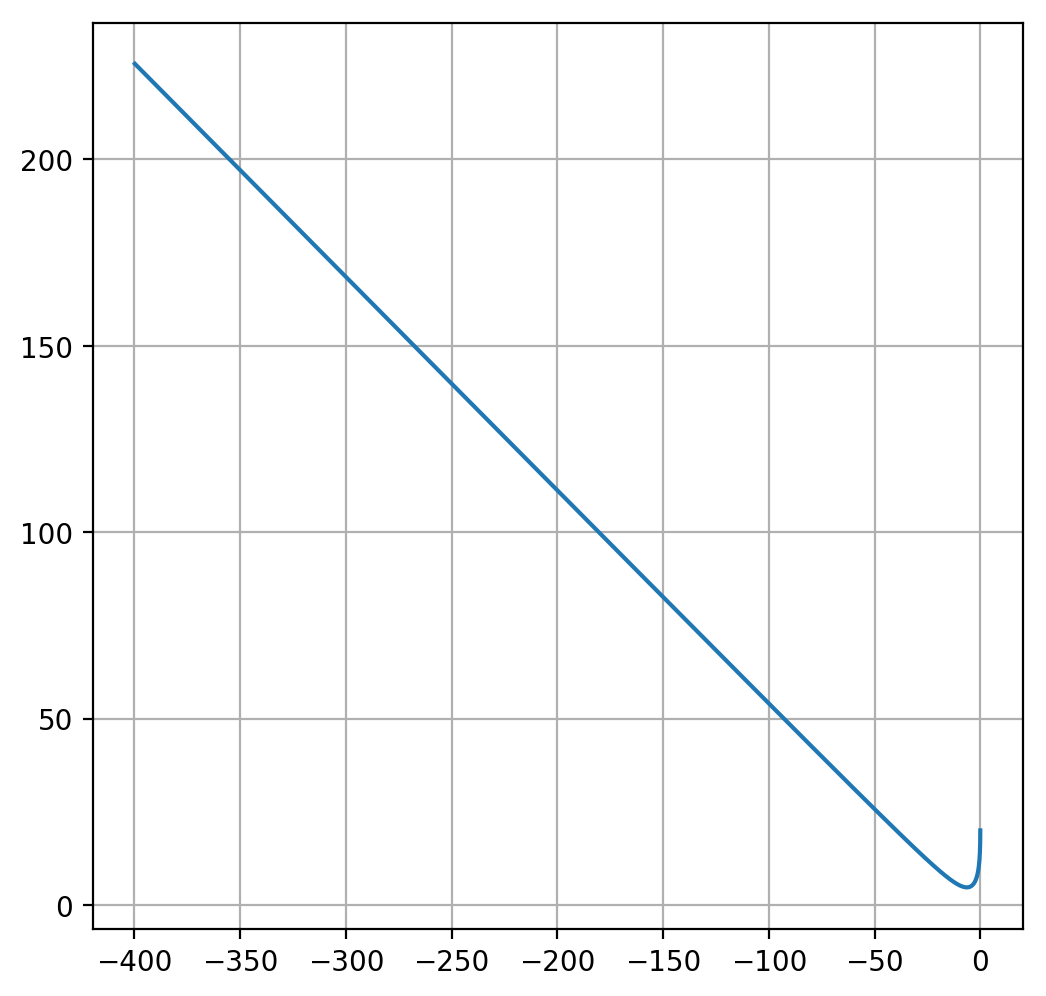

In [8]:
Ke = 100e9*(1.602176565e-19) # energía cinética de los protones
m = 1.672621777e-27 # masa del protón
c = 299792458 # velocidad de la luz en el vacío
A= Ke/(m*c**2) 
v = c*np.sqrt(1-(1/(A+1)**2)) #rapidez inicial de los protones
#condiciones_iniciales_1 = np.array([0,0,20*re,-v,0,0])
#condiciones_iniciales_2 = np.array([20*re,0,0,vy_ini_1,0,vz_ini_1])
#condiciones_iniciales_2 = np.array([20*re,0,0,vy_ini_1,0,vz_ini_1])
tiempo = arange(0,10,dt) # vector de tiempo
solucion = odeint(fun_, condiciones_iniciales_1, tiempo, args=(B0,re,m,gamma, q))

# posición para el primer protón (se divide por re para dejar todo expresado en unidades de radio terrestre)
x = solucion[:,0]/re
y = solucion[:,2]/re
z = solucion[:,4]/re
plt.figure(num = 2, figsize = (6,6),dpi=200)
plt.plot(x,y)
plt.grid(True)
plt.show()

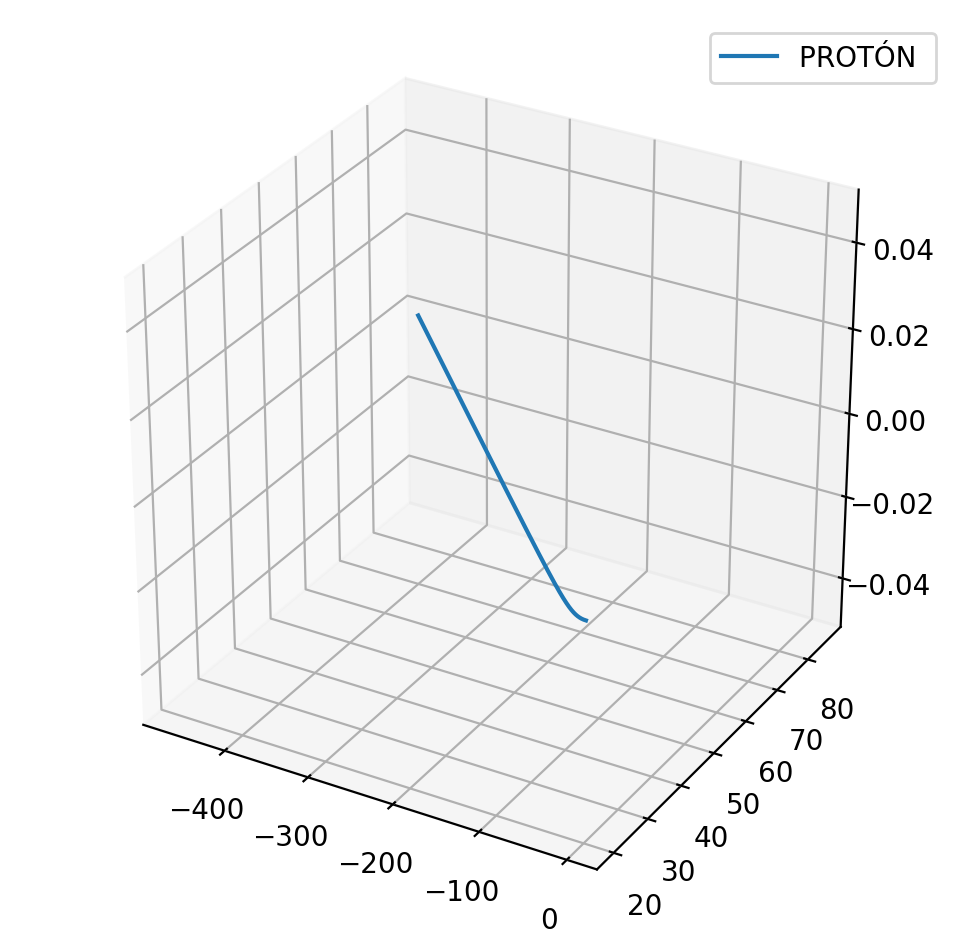

In [7]:
fig = plt.figure(num = 1, figsize = (6,6),dpi=200)
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='PROTÓN ')
ax.legend()
plt.show()